# Text pre-processing, Classification and Sentiment Analysis 

##  Loading speeches from the text files and storing it in a Pandas Dataframe

For coding purposes we will be loading and storing the presidential speeches in a chronogical order

In [1]:
import glob
import pandas as pd 
import numpy as np
import re
import os
import matplotlib.pyplot as plt 

## Lists of presidents sorted, and list of the number of speeches of presidents sorted 
pr_sorted= ['George Washington']*21+['Thomas Jefferson']*24 +['Andrew Jackson']*26+['Franklin D. Roosevelt']*49 + ['Richard M. Nixon']*23 +['Ronald Reagan']*59+ ['George H. W. Bush']*23 + ['Bill Clinton']*39 + ['George W. Bush']*39 + ['Barack Obama']*50 + ['Donald Trump']*22
presidents_sorted = ["George Washington","Thomas Jefferson","Andrew Jackson","Franklin D. Roosevelt",'Richard M. Nixon',"Ronald Reagan","George H. W. Bush","Bill Clinton","George W. Bush","Barack Obama",'Donald Trump']

#getting paths for speeches of presidents sorted by time and storing in dictionnary 
speeches_path=[]
for i in presidents_sorted : 
    speeches_path += list(os.listdir(os.path.join(os.getcwd(), "presidents-speeches/" + str(i) + "/speeches")))

dict_ = dict(dict(zip(speeches_path,pr_sorted)))
array=np.array([[key,val] for (key,val) in dict_.items()])
df = pd.DataFrame(array,columns=["speech","name"])


Getting dates of different speeches and sorting them chronogically

In [8]:

date = []
for i in range(len(df)):
    date.append(df["speech"][i].split("_")[0])
## Sorting dates 

from datetime import datetime
date.sort(key=lambda date: datetime.strptime(date, "%B %d, %Y"))


In [9]:
## Loading speeches by sorted dates

file_list_sorted = []
corpus_sorted = []
mini_corpus_sorted = []
for name in presidents_sorted : 
    for j in date:
        file_list_sorted += glob.glob(os.path.join(os.getcwd(), "presidents-speeches/" + str(name) + "/speeches/"+ j +"*.txt"))
    mini_corpus_sorted = [name]
for file in file_list_sorted:
    mini_corpus_sorted=([open(file).read()])
    corpus_sorted.append(mini_corpus_sorted)   

In [11]:
# Putting speeches sorted by date in Dataframe
list__ = []
for i in corpus_sorted:
    list__.append(str(i))
df["speech"]= list__

In [104]:
df["date of speech"] = date
df

,speech,name,date of speech,processed_speech_stemmed,compound,neg,neu,pos,negative scaled,positive scaled,overall sentiment
0,[Fellow Citizens of the Senate and the House o...,George Washington,"April 30, 1789",[fellow citizen senat hous representatives: am...,0.9996,0.046,0.669,0.285,0.138973,0.861027,0.722054
1,[Whereas it is the duty of all Nations to ackn...,George Washington,"October 3, 1789",[wherea duti nation acknowledg provid almighti...,0.9987,0.013,0.581,0.406,0.031026,0.968974,0.937947
2,"[""b'Fellow Citizens of the Senate and House of...",George Washington,"January 8, 1790","[""b'fellow citizen senat hous representatives:...",0.9988,0.033,0.694,0.274,0.107492,0.892508,0.785016
3,"[""b' Fellow citizens of the Senate and House o...",George Washington,"December 8, 1790","[""b' fellow citizen senat hous representatives...",0.9982,0.049,0.759,0.192,0.203320,0.796680,0.593361
4,"[ I the President of the United States, by my ...",George Washington,"December 29, 1790","[ presid unit states, mouth, written speech si...",0.9921,0.125,0.681,0.195,0.390625,0.609375,0.218750
...,...,...,...,...,...,...,...,...,...,...,...
370,"[""b'PRESIDENT TRUMP: Thank you very much. Mr. ...",Donald Trump,"September 24, 2019","[""b'presid trump: thank much. mr. president, m...",0.9999,0.112,0.641,0.247,0.311978,0.688022,0.376045
371,"[""b'PRESIDENT TRUMP: Thank you very much. Than...",Donald Trump,"September 25, 2019","[""b'presid trump: thank much. thank you. well,...",0.9998,0.084,0.753,0.163,0.340081,0.659919,0.319838
372,"[""b'Last night, the United States brought the ...",Donald Trump,"October 27, 2019","[""b'last night, unit state brought world numbe...",-0.9987,0.305,0.520,0.175,0.635417,0.364583,-0.270833
373,"[""b'Hello, everybody.Well, thank you very much...",Donald Trump,"January 3, 2020","[""b'hello, everybody.well, thank much.and good...",-0.9872,0.266,0.533,0.201,0.569593,0.430407,-0.139186


## Preprocessing Data

Cleaning Data with regex expressions

In [29]:

df["speech"].replace(to_replace="(\\\\r|\\\\xe2|\\\\x80|\\\\xc2|\\\\xa0|\\\\x99|\\\\x94|\\\\n|'b\\\"|\\\\)",value="",regex = True, inplace = True)
df["speech"].replace(to_replace="'b\"/",value="",regex = True, inplace = True)
df["speech"].replace(to_replace="\\/",value="",regex = True, inplace = True)
df["speech"].replace(to_replace="'b\'",value="",regex = True, inplace = True)
df["speech"].replace(to_replace="xc2xa0'", value = "", regex = True, inplace= True)
df["speech"].replace(to_replace="   ", value = " ", regex = True, inplace= True)


 Stemming data, removing stopwords and saving it in a new column

In [48]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stemmer = PorterStemmer()
def cleaning_text(message) :
    words = [stemmer.stem(word) for word in str(message).split() if word.lower() not in stopwords.words("english")]
    return " ".join(words)
df["processed_speech_stemmed"] = df["speech"].apply(cleaning_text)

In [61]:
df

,speech,name,date of speech,processed_speech_stemmed
0,[Fellow Citizens of the Senate and the House o...,George Washington,"April 30, 1789",[fellow citizen senat hous representatives: am...
1,[Whereas it is the duty of all Nations to ackn...,George Washington,"October 3, 1789",[wherea duti nation acknowledg provid almighti...
2,"[""b'Fellow Citizens of the Senate and House of...",George Washington,"January 8, 1790","[""b'fellow citizen senat hous representatives:..."
3,"[""b' Fellow citizens of the Senate and House o...",George Washington,"December 8, 1790","[""b' fellow citizen senat hous representatives..."
4,"[ I the President of the United States, by my ...",George Washington,"December 29, 1790","[ presid unit states, mouth, written speech si..."
...,...,...,...,...
370,"[""b'PRESIDENT TRUMP: Thank you very much. Mr. ...",Donald Trump,"September 24, 2019","[""b'presid trump: thank much. mr. president, m..."
371,"[""b'PRESIDENT TRUMP: Thank you very much. Than...",Donald Trump,"September 25, 2019","[""b'presid trump: thank much. thank you. well,..."
372,"[""b'Last night, the United States brought the ...",Donald Trump,"October 27, 2019","[""b'last night, unit state brought world numbe..."
373,"[""b'Hello, everybody.Well, thank you very much...",Donald Trump,"January 3, 2020","[""b'hello, everybody.well, thank much.and good..."


 ## Train Test Splitting

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Shuffling data so the model won't be biased
train_x, test_x, train_y, test_y = train_test_split(df['processed_speech_stemmed'],df['name'], test_size = 0.2, shuffle = True)



## TFIDF vectorizing


In [63]:
tfidf_vect= TfidfVectorizer()
tfidf_vect.fit(df['processed_speech_stemmed'])
train_x_tfidf = tfidf_vect.transform(train_x)
test_x_tfidf = tfidf_vect.transform(test_x)

## Prediction Models 


Naive Bayes Classifier

In [131]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score
naive_model= naive_bayes.MultinomialNB(alpha = 0.00001)
naive_model.fit(train_x_tfidf,train_y)
predictionNB = naive_model.predict(test_x_tfidf)


In [132]:
print("Accuracy score of the Multinomial NB : is ", accuracy_score(test_y, predictionNB))

Accuracy score of the Multionomal NB : is  0.84


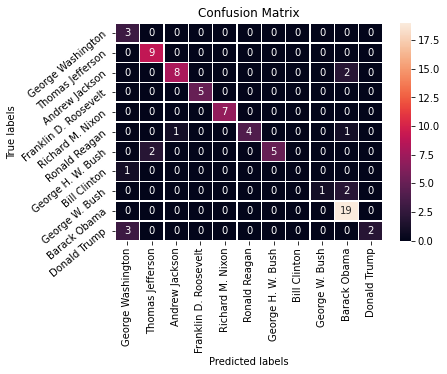

In [133]:
import matplotlib as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt    
#Confusion matrix
cm_NB = confusion_matrix(test_y, predictionNB)
ax= plt.subplot()
sns.heatmap(cm_NB, annot=True, ax = ax,linewidths=.5)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(presidents_sorted, rotation = 90); ax.yaxis.set_ticklabels(presidents_sorted,rotation = 40);

In [70]:
# Support Vector Classification model
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(train_x_tfidf,train_y)
predictionsvc = svc_model.predict(test_x_tfidf)

In [71]:
print("Accuracy score of the Support Vector Classifier is ", accuracy_score(test_y, predictionsvc))

Accuracy score of the Support Vector Classifier is  0.72


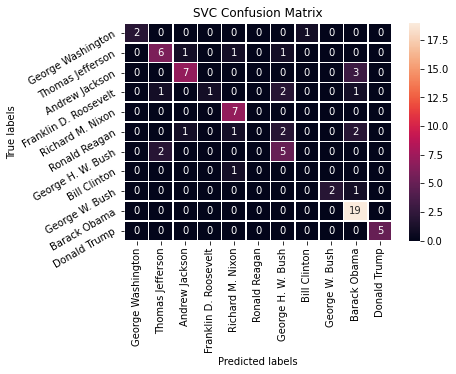

In [107]:
#Confusion matrix
cm_SVC = confusion_matrix(test_y, predictionsvc)
ax= plt.subplot()
sns.heatmap(cm_SVC, annot=True, ax = ax,linewidths=.5)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('SVC Confusion Matrix'); 
ax.xaxis.set_ticklabels(presidents_sorted, rotation = 90); ax.yaxis.set_ticklabels(presidents_sorted,rotation = 30);

In [75]:
# KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier(n_neighbors=5, weights='distance',algorithm='auto')
knc_model.fit(train_x_tfidf,train_y)
predictionknc = knc_model.predict(test_x_tfidf)

In [76]:
print("Accuracy score of the KNeighbors Classifier is", accuracy_score(test_y, predictionknc))

Accuracy score of the KNeighbors Classifier is 0.72


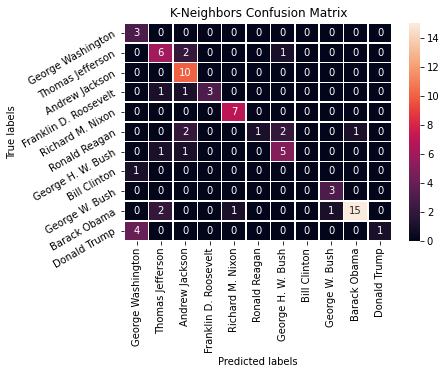

In [108]:
#Confusion matrix
cm_KN = confusion_matrix(test_y, predictionknc)
ax= plt.subplot()
sns.heatmap(cm_KN, annot=True, ax = ax,linewidths=.5)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('K-Neighbors Confusion Matrix'); 
ax.xaxis.set_ticklabels(presidents_sorted, rotation = 90); ax.yaxis.set_ticklabels(presidents_sorted,rotation = 30);

In [80]:
## Stochastic gradient descent classifier
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(train_x_tfidf,train_y)
predictionsgd = sgd_model.predict(test_x_tfidf)

In [81]:
print("Accuracy score of the SGD Classifier is ", accuracy_score(test_y, predictionsgd))

Accuracy score of the SGD Classifier is  0.96


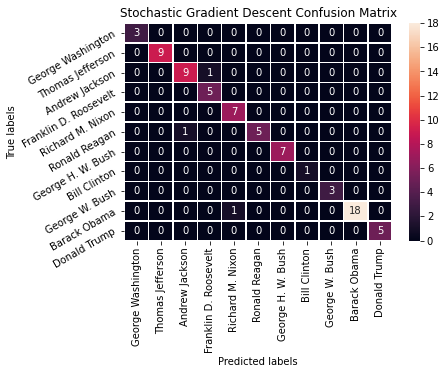

In [109]:
#Confusion matrix
cm_SGD = confusion_matrix(test_y, predictionsgd)
ax= plt.subplot()
sns.heatmap(cm_SGD, annot=True, ax = ax,linewidths=.5)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Stochastic Gradient Descent Confusion Matrix'); 
ax.xaxis.set_ticklabels(presidents_sorted, rotation = 90); ax.yaxis.set_ticklabels(presidents_sorted,rotation = 30);

## Part B : Sentiment Analysis

Vader Sentiment Analysis

In [91]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
l = []
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df["processed_speech_stemmed"]]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df["processed_speech_stemmed"]]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df["processed_speech_stemmed"]]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df["processed_speech_stemmed"]]

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate

## Counting the number of negative speeches vs the number of positive speeches for every president

In order to give for each speech an overall sentiment score. The neutrality percentage of the speech should be taken into account in order to avoid bias. To do so, we decided to normalize the postive & negative scores in a way that the neutral score wouldn't affect the comparison of every speech's sentiment. Therefore, we chose to normalize as follows: 
neg = neg/(neg+pos)
pos = pos/(neg+pos)

In [92]:
df["negative scaled"] = df["neg"]/(df["neg"]+df["pos"])
df["positive scaled"] = df["pos"]/(df["neg"]+df["pos"])
df["overall sentiment"] = df["positive scaled"] - df["negative scaled"]

In [111]:
def speeches_sentiment_count(names) :
    affectionate = []
    dreadful = []
    for i in names:
        num_pos = df.loc[(df["name"] == i) & (df["overall sentiment"]>0)]
        num_neg = df.loc[(df["name"] == i) & (df["overall sentiment"]<0)]
        num_pos = num_pos.shape[0]
        num_neg = num_neg.shape[0]
        print(" The number of positive and negative speeches of ", i, " are respectively : ", num_pos , num_neg)
        affectionate.append(num_pos)
        dreadful.append(num_neg)
    return(affectionate, dreadful)
pos, neg = speeches_sentiment_count(presidents_sorted)

 The number of positive and negative speeches of  George Washington  are respectively :  20 1
 The number of positive and negative speeches of  Thomas Jefferson  are respectively :  24 0
 The number of positive and negative speeches of  Andrew Jackson  are respectively :  26 0
 The number of positive and negative speeches of  Franklin D. Roosevelt  are respectively :  37 11
 The number of positive and negative speeches of  Richard M. Nixon  are respectively :  20 3
 The number of positive and negative speeches of  Ronald Reagan  are respectively :  56 3
 The number of positive and negative speeches of  George H. W. Bush  are respectively :  21 2
 The number of positive and negative speeches of  Bill Clinton  are respectively :  39 0
 The number of positive and negative speeches of  George W. Bush  are respectively :  32 7
 The number of positive and negative speeches of  Barack Obama  are respectively :  47 3
 The number of positive and negative speeches of  Donald Trump  are respectiv

<AxesSubplot:xlabel='name'>

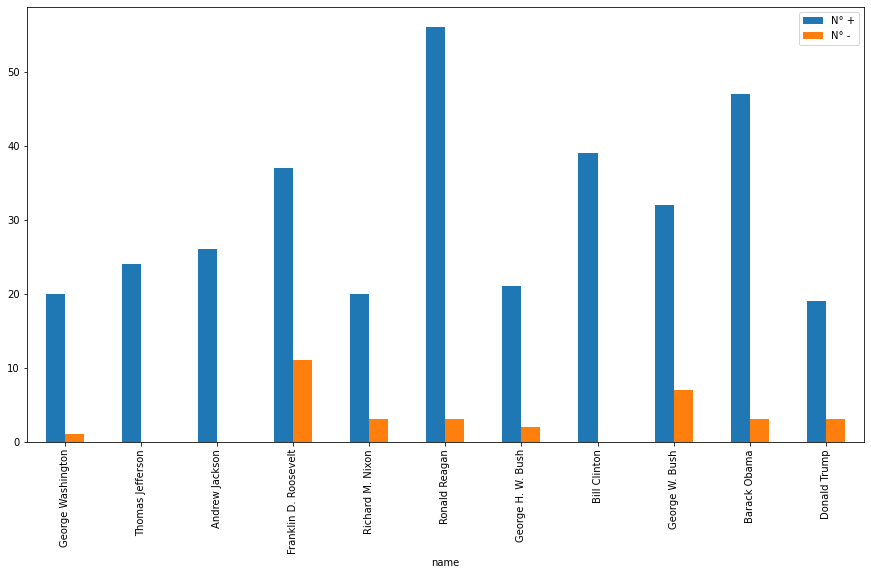

In [112]:
count_list = [presidents_sorted, pos, neg]

 

count_dataframe = pd.DataFrame(count_list, index = ['name', 'N° +', 'N° -']).transpose()
count_dataframe.set_index('name').plot.bar(figsize = (15,8))

# Visualizing the sentiment of every president over his presidential period. 


We will be comparing between the compound built in metric of Vader and the pos-neg normalized metric we made for each analysis

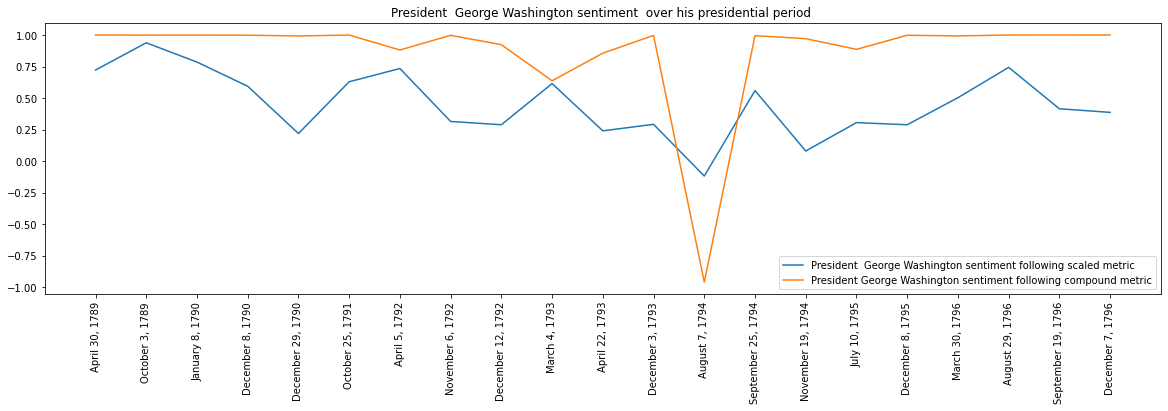

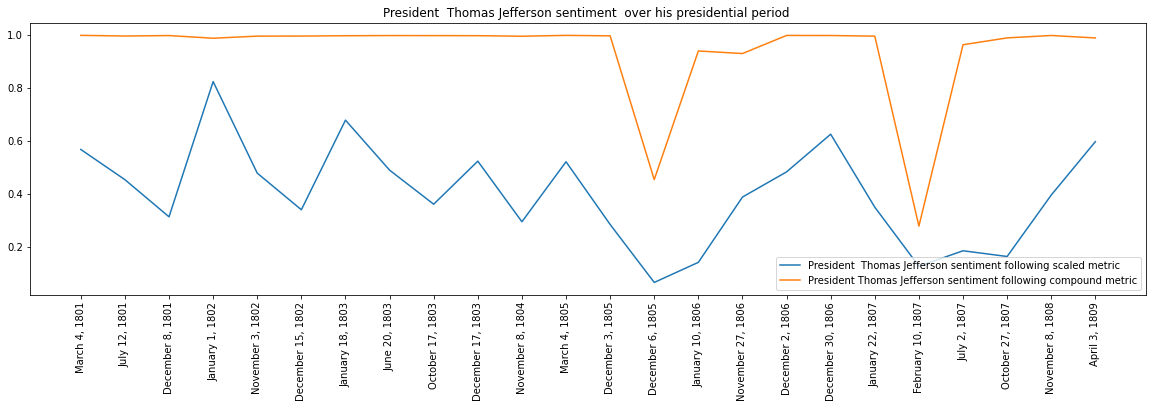

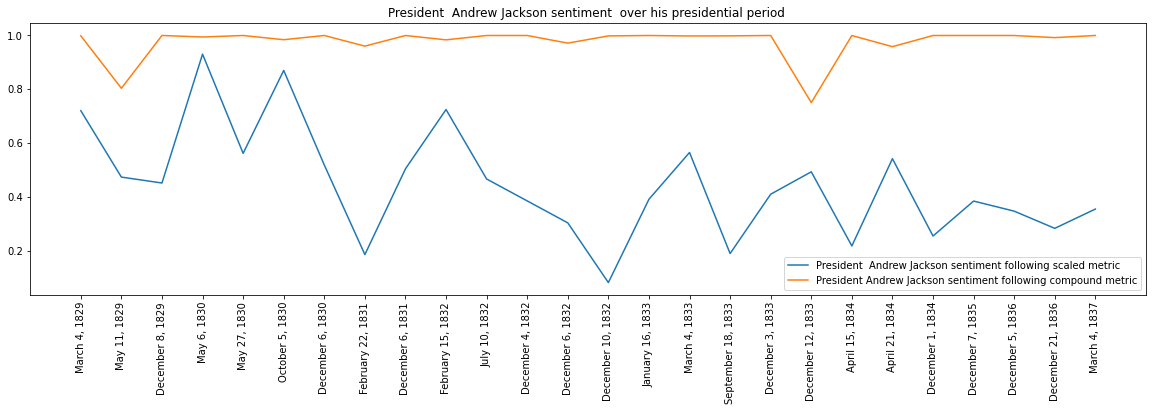

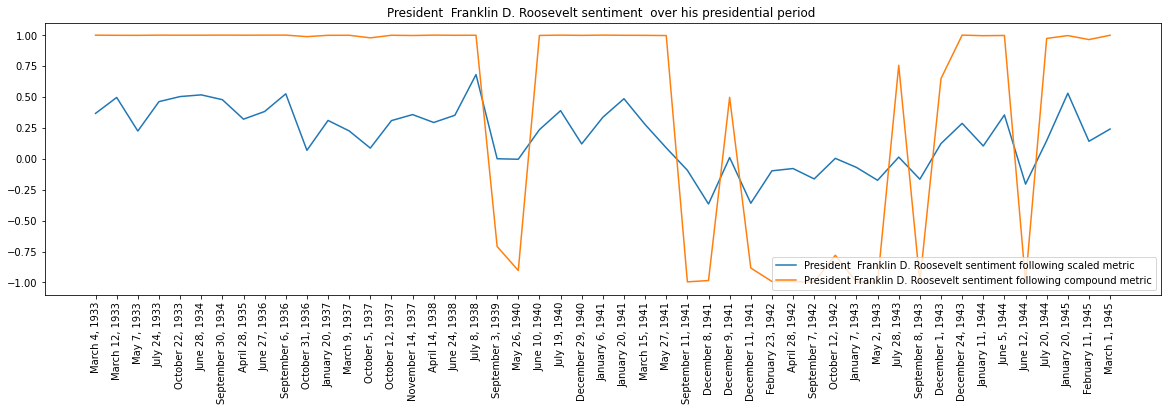

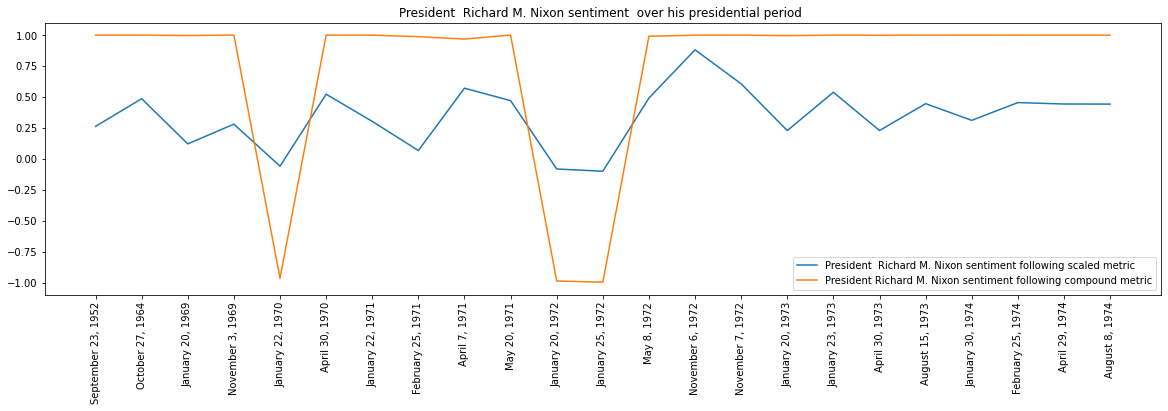

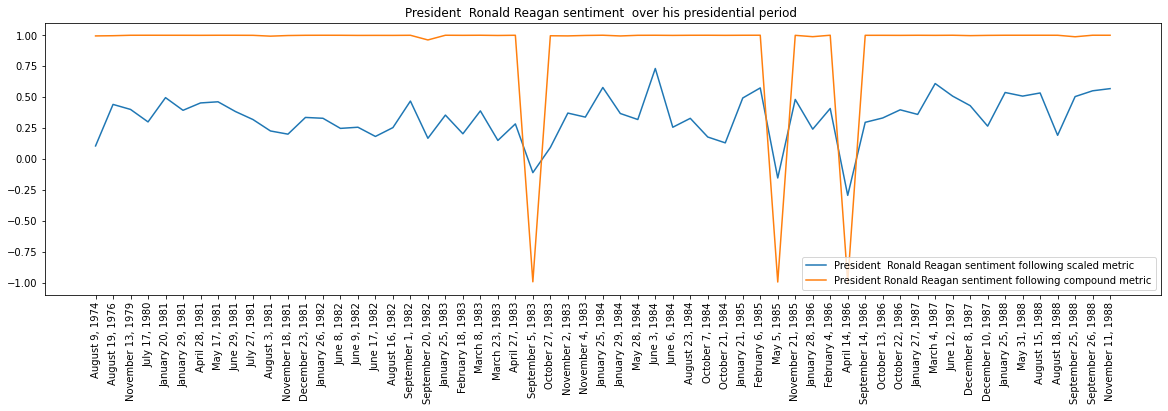

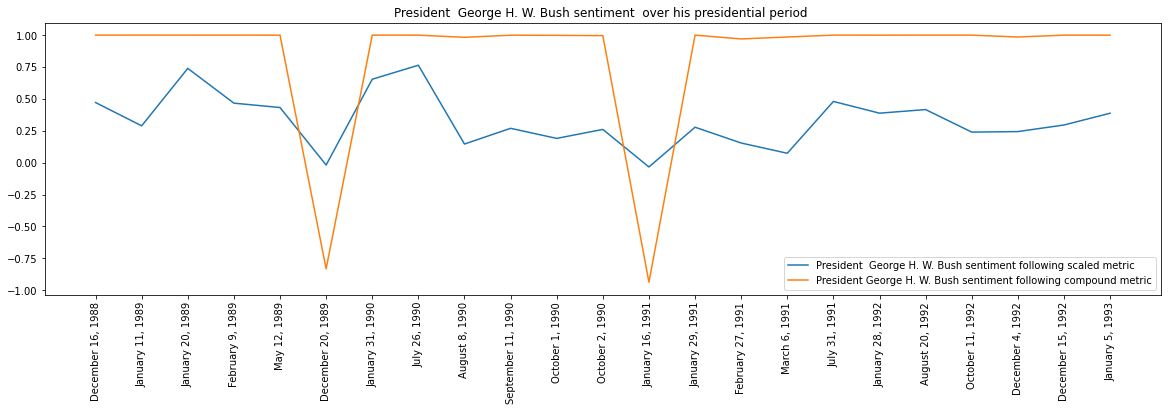

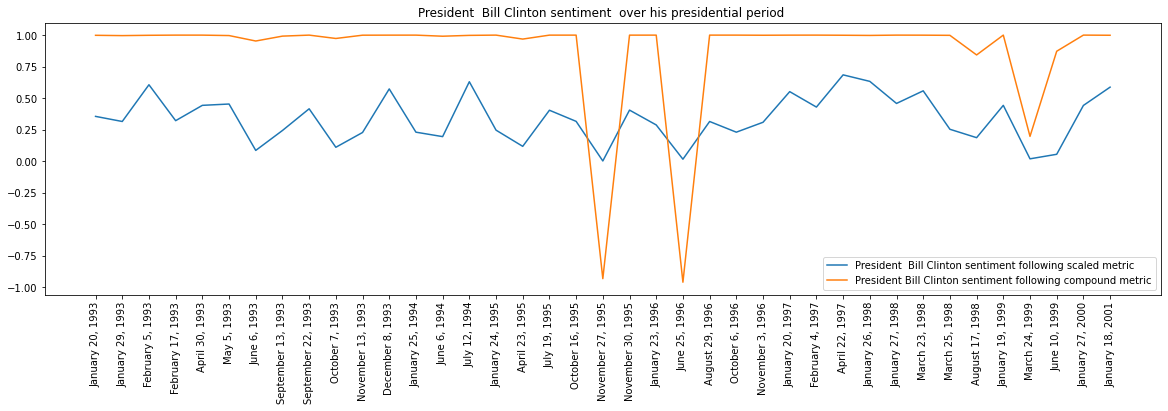

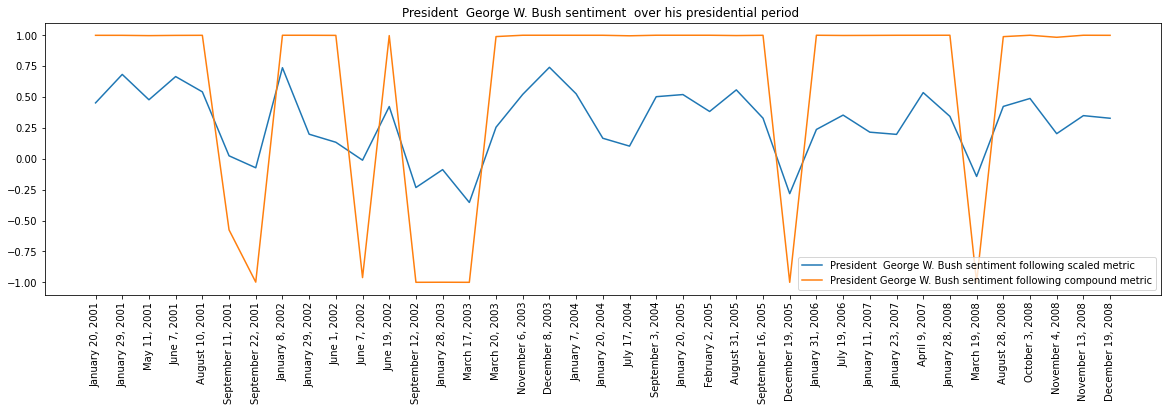

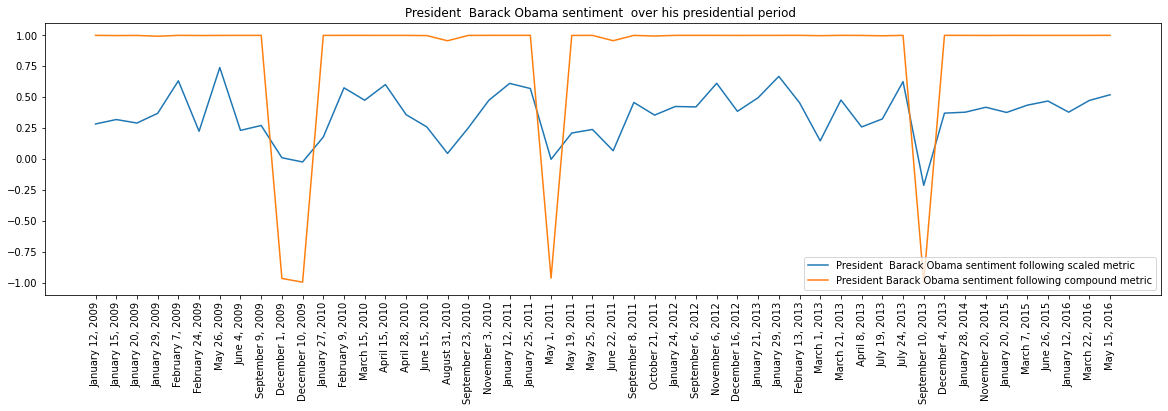

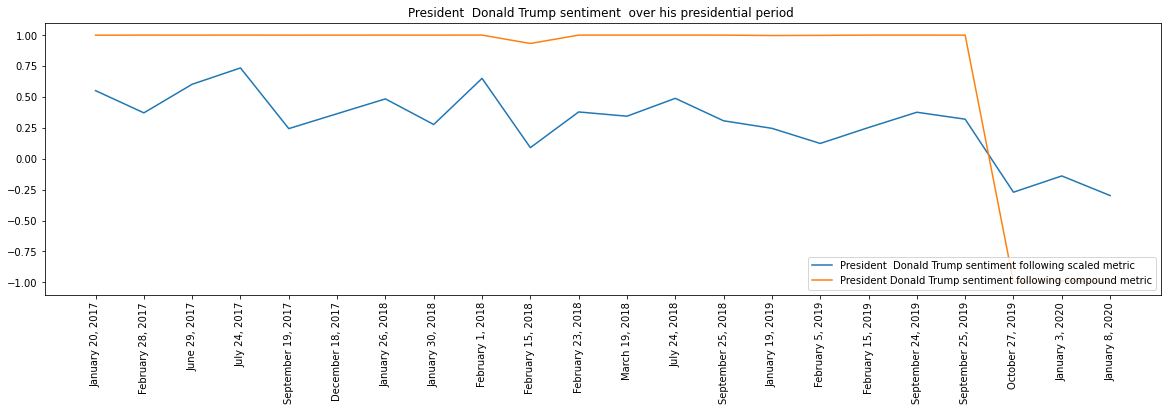

In [103]:
import matplotlib.pyplot as plt
for i in presidents_sorted:
    data_ =  df.loc[df["name"] == i]
    figu = plt.figure(figsize=(20, 5))
    axs = figu.add_subplot(111)
    axs.set_title("President  "+ i + " sentiment  over his presidential period ")
    axs.plot(data_["date of speech"],data_["overall sentiment"] )
    axs.plot(data_["date of speech"],data_["compound"] )
    axs.legend(["President  "+ i + " sentiment following scaled metric", "President " + i + " sentiment following compound metric"], loc = 'lower right')
    plt.setp(axs.xaxis.get_majorticklabels(), rotation=90)
    plt.tick_params(axis='x', which='major', labelsize=10)

## Visualizing the overall sentiments of all presidential speeches

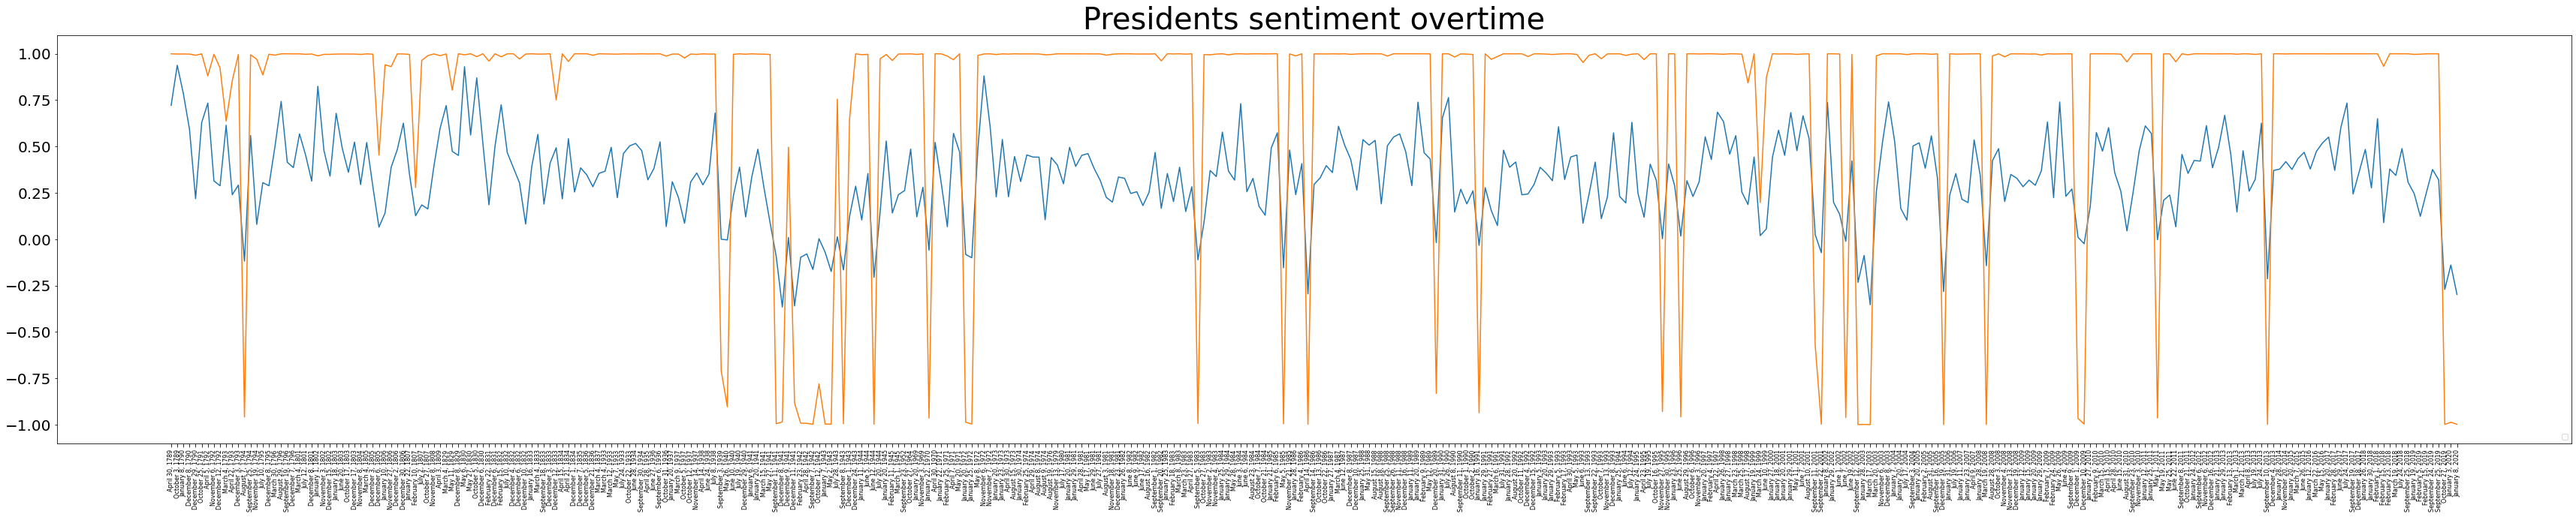

In [97]:
import matplotlib.pyplot as plt
figu = plt.figure(figsize=(60, 10))
axe = figu.add_subplot(111)
axe.legend(["Presidential sentiment following scaled metric", "Presidential sentiment following compound metric"], loc = 'lower right')
axe.tick_params(axis='x', which='major', labelsize=8, length = 5)
axe.tick_params(axis='y', which='major', labelsize=20)
plt.setp(axe.xaxis.get_majorticklabels(), rotation=90)
axe.autoscale(enable=True, axis='x')
axe.set_title("Presidents sentiment overtime", fontsize =40)
axe.plot(date,df["overall sentiment"])
axe.plot(date,df["compound"])